# PyCaret Churn

PyCaret is an open-source, low-code machine learning library in Python that automates machine learning workflows. It is an end-to-end machine learning and model management tool that exponentially speeds up the experiment cycle and makes you more productive.

Compared with the other open-source machine learning libraries, PyCaret is an alternate low-code library that can be used to replace hundreds of lines of code with a few lines only. This makes experiments exponentially fast and efficient. PyCaret is essentially a Python wrapper around several machine learning libraries and frameworks, such as scikit-learn, XGBoost, LightGBM, CatBoost, spaCy, Optuna, Hyperopt, Ray, and a few more.

The design and simplicity of PyCaret are inspired by the emerging role of citizen data scientists, a term first used by Gartner. Citizen Data Scientists are power users who can perform both simple and moderately sophisticated analytical tasks that would previously have required more technical expertise.


**=================================================================================================================**

## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero, median, mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Plotly
# import plotly.express as px
# import plotly.offline as py
# import plotly.graph_objs as go

# import statsmodels.api as sm
# import statsmodels.formula.api as smf
# from statsmodels.formula.api import ols

# import researchpy as rp

# import shap
# import eli5
# from IPython.display import display


import datetime
from datetime import datetime, timedelta, date

#import os
#import zipfile

# import scipy.stats
# from scipy.stats import zscore
# from collections import Counter


# import xgboost as xgb
# from xgboost import XGBClassifier, XGBRegressor
# from xgboost import to_graphviz, plot_importance, plot_tree

# import sklearn
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures

# from sklearn.model_selection import KFold, StratifiedKFold
# from sklearn.model_selection import train_test_split, cross_validate

# from sklearn.feature_selection import f_regression, f_classif, chi2, RFE, RFECV
# from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
# from sklearn.feature_selection import VarianceThreshold, GenericUnivariateSelect
# from sklearn.feature_selection import SelectFromModel, SelectKBest, SelectPercentile

#from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

# from sklearn.inspection import permutation_importance

# from sklearn.tree import export_graphviz, plot_tree
# from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
# from sklearn.metrics import ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay
# from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score, accuracy_score, jaccard_score
# from sklearn.metrics import log_loss


#from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, LogisticRegression, Ridge, LogisticRegressionCV
# from sklearn.tree import (DecisionTreeClassifier, DecisionTreeRegressor, ExtraTreeClassifier,
# ExtraTreeRegressor, plot_tree)
#from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
#from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR
#from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, CategoricalNB
#from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, ExtraTreesClassifier, ExtraTreesRegressor
#from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor, HistGradientBoostingClassifier, HistGradientBoostingRegressor

#from sklearn.dummy import DummyClassifier

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

#import imblearn
#from imblearn.under_sampling import RandomUnderSampler
#from imblearn.over_sampling import RandomOverSampler
#from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

# import pickle
# from pickle import dump, load

# Use Feature-Engine library

#import feature_engine


# PyCaret
from pycaret.classification import *
#from pycaret.clustering import *
#from pycaret.regression import *

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',100)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

# Ensure results are reproducible
random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


In [ ]:
# check installed version
import pycaret
pycaret.__version__

**=================================================================================================================**

## Data Quick Glance

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df

,accountage,monthlycharges,totalcharges,subscriptiontype,paymentmethod,paperlessbilling,contenttype,multideviceaccess,deviceregistered,viewinghoursperweek,averageviewingduration,contentdownloadspermonth,genrepreference,userrating,supportticketspermonth,gender,watchlistsize,parentalcontrol,subtitlesenabled,churn
0,20,11.06,221.10,Premium,Mailed check,No,Both,No,Mobile,36.76,63.53,10,Sci-Fi,2.18,4,Male,3,No,No,0
1,57,5.18,294.99,Basic,Credit card,Yes,Movies,No,Tablet,32.45,25.73,18,Action,3.48,8,Male,23,No,Yes,0
2,73,12.11,883.79,Basic,Mailed check,Yes,Movies,No,Computer,7.40,57.36,23,Fantasy,4.24,6,Male,1,Yes,Yes,0
3,32,7.26,232.44,Basic,Electronic check,No,TV Shows,No,Tablet,27.96,131.54,30,Drama,4.28,2,Male,24,Yes,Yes,0
4,57,16.95,966.33,Premium,Electronic check,Yes,TV Shows,No,TV,20.08,45.36,20,Comedy,3.62,4,Female,0,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243782,77,9.64,742.27,Basic,Mailed check,No,Movies,No,Computer,13.50,80.37,47,Sci-Fi,3.70,1,Male,8,Yes,No,0
243783,117,13.05,1526.76,Premium,Credit card,No,TV Shows,Yes,TV,24.96,59.82,35,Comedy,1.45,4,Male,20,No,No,0
243784,113,14.51,1640.15,Premium,Credit card,Yes,TV Shows,No,TV,10.63,176.19,44,Action,4.01,6,Male,13,Yes,Yes,0
243785,7,18.14,126.98,Premium,Bank transfer,Yes,TV Shows,No,TV,30.47,153.39,36,Fantasy,2.14,7,Female,5,No,Yes,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountage                243787 non-null  int64  
 1   monthlycharges            243787 non-null  float64
 2   totalcharges              243787 non-null  float64
 3   subscriptiontype          243787 non-null  object 
 4   paymentmethod             243787 non-null  object 
 5   paperlessbilling          243787 non-null  object 
 6   contenttype               243787 non-null  object 
 7   multideviceaccess         243787 non-null  object 
 8   deviceregistered          243787 non-null  object 
 9   viewinghoursperweek       243787 non-null  float64
 10  averageviewingduration    243787 non-null  float64
 11  contentdownloadspermonth  243787 non-null  int64  
 12  genrepreference           243787 non-null  object 
 13  userrating                243787 non-null  f

In [ ]:
df.dtypes.value_counts()

In [ ]:
# Descriptive Statistical Analysis
df.describe(include="all")

In [ ]:
# Descriptive Statistical Analysis
df.describe(include=["int", "float"])

In [ ]:
# Descriptive Statistical Analysis
df.describe(include="object")

In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
# Check class balance
df['left'].value_counts().to_frame()

**=================================================================================================================**

## Data Visualization

In [ ]:
df.hist(bins=50, figsize=(20,45), grid=False, layout=(len(df.columns),2), edgecolor = 'black')
plt.suptitle('Histogram Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
df.boxplot(figsize=(20,10), color="blue", fontsize = 15)
plt.title('BoxPlots Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

**=================================================================================================================**

## Sample a smaller dataset

In [5]:
df = df.sample(frac=0.1)

In [6]:
df

,accountage,monthlycharges,totalcharges,subscriptiontype,paymentmethod,paperlessbilling,contenttype,multideviceaccess,deviceregistered,viewinghoursperweek,averageviewingduration,contentdownloadspermonth,genrepreference,userrating,supportticketspermonth,gender,watchlistsize,parentalcontrol,subtitlesenabled,churn
86721,13,19.71,256.26,Basic,Credit card,No,Both,No,Tablet,6.48,50.03,33,Action,1.18,6,Male,7,Yes,No,0
160337,57,9.25,527.13,Premium,Bank transfer,No,Both,No,Mobile,17.04,44.53,14,Action,4.57,8,Male,7,Yes,Yes,0
202410,99,9.36,926.48,Basic,Bank transfer,No,Both,Yes,Computer,14.30,43.81,31,Fantasy,1.95,0,Male,17,No,No,0
102943,28,13.17,368.90,Basic,Mailed check,Yes,Movies,No,Mobile,6.88,57.23,49,Drama,1.41,2,Female,7,Yes,Yes,0
165297,7,18.95,132.63,Standard,Bank transfer,Yes,Both,Yes,Tablet,27.01,95.18,44,Fantasy,3.99,7,Female,11,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202455,109,19.31,2105.27,Basic,Electronic check,Yes,TV Shows,Yes,Computer,8.90,51.56,12,Comedy,1.39,6,Female,20,Yes,No,0
40636,23,8.70,200.13,Standard,Electronic check,Yes,Both,Yes,TV,8.58,26.49,3,Comedy,1.44,7,Female,9,Yes,Yes,0
41783,90,19.66,1769.08,Basic,Bank transfer,Yes,Movies,Yes,Computer,2.19,100.69,23,Drama,2.86,7,Male,20,Yes,Yes,0
176345,100,11.94,1194.10,Standard,Mailed check,No,Both,No,TV,28.80,94.19,10,Sci-Fi,4.89,9,Male,9,Yes,No,0


In [7]:
df.reset_index(drop=True, inplace=True)

In [8]:
df.shape

(24379, 20)

In [9]:
df.churn.value_counts()

0    19990
1     4389
Name: churn, dtype: int64

In [10]:
df.head()

,accountage,monthlycharges,totalcharges,subscriptiontype,paymentmethod,paperlessbilling,contenttype,multideviceaccess,deviceregistered,viewinghoursperweek,averageviewingduration,contentdownloadspermonth,genrepreference,userrating,supportticketspermonth,gender,watchlistsize,parentalcontrol,subtitlesenabled,churn
0,13,19.71,256.26,Basic,Credit card,No,Both,No,Tablet,6.48,50.03,33,Action,1.18,6,Male,7,Yes,No,0
1,57,9.25,527.13,Premium,Bank transfer,No,Both,No,Mobile,17.04,44.53,14,Action,4.57,8,Male,7,Yes,Yes,0
2,99,9.36,926.48,Basic,Bank transfer,No,Both,Yes,Computer,14.30,43.81,31,Fantasy,1.95,0,Male,17,No,No,0
3,28,13.17,368.90,Basic,Mailed check,Yes,Movies,No,Mobile,6.88,57.23,49,Drama,1.41,2,Female,7,Yes,Yes,0
4,7,18.95,132.63,Standard,Bank transfer,Yes,Both,Yes,Tablet,27.01,95.18,44,Fantasy,3.99,7,Female,11,Yes,No,0


**=================================================================================================================**

# Regression Section

## Model Training

In [ ]:
exp_reg = setup(data = df, target = '', session_id=0, normalize=True) 

In [ ]:
compare_models(exclude=['omp','br','ard','par','ransac','tr','huber','kr','svm','knn','dt','rf',
                        'et','ada','gbr','mlp','xgboost','lightgbm','catboost'],fold=5) # For Regressor

In [ ]:
model_selected = create_model('catboost')

In [ ]:
print(model_selected)

In [ ]:
tuned_model = tune_model(catboost, optimize='mse')

In [ ]:
print(tuned_model)

In [ ]:
plot_model(tuned_model)

In [ ]:
plot_model(tuned_model, plot = 'error')

In [ ]:
plot_model(tuned_model, plot='feature')

In [ ]:
interpret_model(tuned_model)

In [ ]:
evaluate_model(tuned_model)

In [ ]:
predict_model(tuned_model)

In [ ]:
final_model = finalize_model(tuned_model)

In [ ]:
unseen_predictions = predict_model(final_model, data=data_unseen)
unseen_predictions.head()

**=================================================================================================================**

# Classification Section

PyCaret’s Classification Module is a supervised machine learning module that is used for classifying elements into groups. The goal is to predict the categorical class labels which are discrete and unordered. 

Some common use cases include predicting customer default (Yes or No), predicting customer churn (customer will leave or stay), the disease found (positive or negative). 

This module can be used for binary or multiclass problems. It provides several pre-processing features that prepare the data for modeling through the setup function. It has over 18 ready-to-use algorithms and several plots to analyze the performance of trained models.

A typical workflow in PyCaret consist of following 5 steps in this order:

## **Setup** ➡️ **Compare Models** ➡️ **Analyze Model** ➡️ **Prediction** ➡️ **Save Model**

## Setup
This function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function in PyCaret. It only has two required parameters i.e. `data` and `target`. All the other parameters are optional.

Once the setup has been successfully executed it shows the information grid containing experiment level information. 

- **Session id:**  A pseudo-random number distributed as a seed in all functions for later reproducibility. If no `session_id` is passed, a random number is automatically generated that is distributed to all functions.<br/>
<br/>
- **Target type:**  Binary, Multiclass, or Regression. The Target type is automatically detected. <br/>
<br/>
- **Label Encoding:**  When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. In this tutorial, no label encoding is required since the target variable is of numeric type. <br/>
<br/>
- **Original data shape:**  Shape of the original data prior to any transformations. <br/>
<br/>
- **Transformed train set shape :**  Shape of transformed train set <br/>
<br/>
- **Transformed test set shape :**  Shape of transformed test set <br/>
<br/>
- **Numeric features :**  The number of features considered as numerical. <br/>
<br/>
- **Categorical features :**  The number of features considered as categorical. <br/>

All the preprocessing configurations and experiment settings/parameters are passed into the `setup` function. To see all available parameters, check the docstring:

In [11]:
s = setup(data=df, target = 'churn', train_size= 0.8, ordinal_features = None, numeric_features = None, 
          categorical_features = None, date_features = None, text_features = None, 
          ignore_features = None, preprocess = True, imputation_type = 'simple', 
          numeric_imputation = 'mean', categorical_imputation= 'mode', iterative_imputation_iters= 5,
          max_encoding_ohe = 25, encoding_method= None, 
          fix_imbalance = False, fix_imbalance_method = 'SMOTE',
          normalize = True, normalize_method = "minmax",
          feature_selection = False, feature_selection_method = 'classic', 
          feature_selection_estimator='rf', n_features_to_select = 0.2,
          data_split_shuffle = True, data_split_stratify = True, fold_strategy= 'stratifiedkfold',
          fold = 10, fold_shuffle= False, fold_groups = None,
          session_id = 0)

,Description,Value
0,Session id,0
1,Target,churn
2,Target type,Binary
3,Original data shape,"(24379, 20)"
4,Transformed data shape,"(24379, 34)"
5,Transformed train set shape,"(19503, 34)"
6,Transformed test set shape,"(4876, 34)"
7,Ordinal features,5
8,Numeric features,9
9,Categorical features,10


In [12]:
#help(setup)

## Compare Models

This function trains and evaluates the performance of all the estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

By default `compare_models` return the single best performing model based on the metric defined in the `sort` parameter. Let's change our code to return 3 top models based on `Recall`.

In [ ]:
# help(compare_models)

In [ ]:
# check available models
models()

In [14]:
# compare baseline models
clf = compare_models(sort="AUC", include = ['dt', 'rf', 'gbc', 'xgboost'], fold=10, cross_validation=True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8224,0.7258,0.0800,0.5542,0.1395,0.0982,0.1582,0.7160
rf,Random Forest Classifier,0.8211,0.7058,0.0347,0.5643,0.0653,0.0449,0.1046,0.9970
xgboost,Extreme Gradient Boosting,0.8128,0.6939,0.1350,0.4365,0.2059,0.1321,0.1618,0.6530
dt,Decision Tree Classifier,0.7252,0.5544,0.2874,0.2612,0.2735,0.1047,0.1049,0.5940


Processing:   0%|          | 0/21 [00:00<?, ?it/s]

In [15]:
clf

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [16]:
clf_results = pull()
clf_results

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.82,0.73,0.08,0.55,0.14,0.10,0.16,0.72
rf,Random Forest Classifier,0.82,0.71,0.03,0.56,0.07,0.04,0.10,1.00
xgboost,Extreme Gradient Boosting,0.81,0.69,0.14,0.44,0.21,0.13,0.16,0.65
dt,Decision Tree Classifier,0.73,0.55,0.29,0.26,0.27,0.10,0.10,0.59


## ✅ Set Custom Metrics

## ✅ Experiment Logging
PyCaret integrates with many different type of experiment loggers (default = 'mlflow'). To turn on experiment tracking in PyCaret you can set `log_experiment` and `experiment_name` parameter. It will automatically track all the metrics, hyperparameters, and artifacts based on the defined logger.

## Analyze Model
You can use the `plot_model` function to analyzes the performance of a trained model on the test set. It may require re-training the model in certain cases.

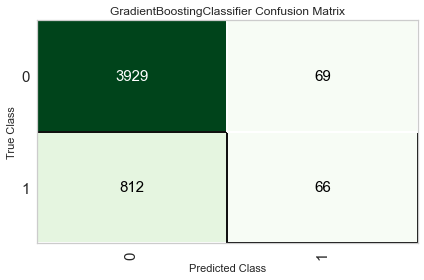

In [17]:
# plot confusion matrix
plot_model(clf, plot = 'confusion_matrix')

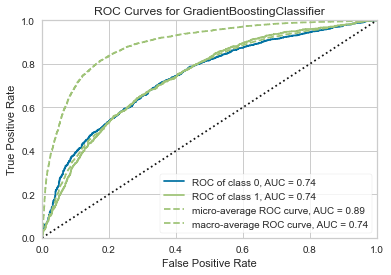

In [18]:
# plot AUC
plot_model(clf, plot = 'auc')

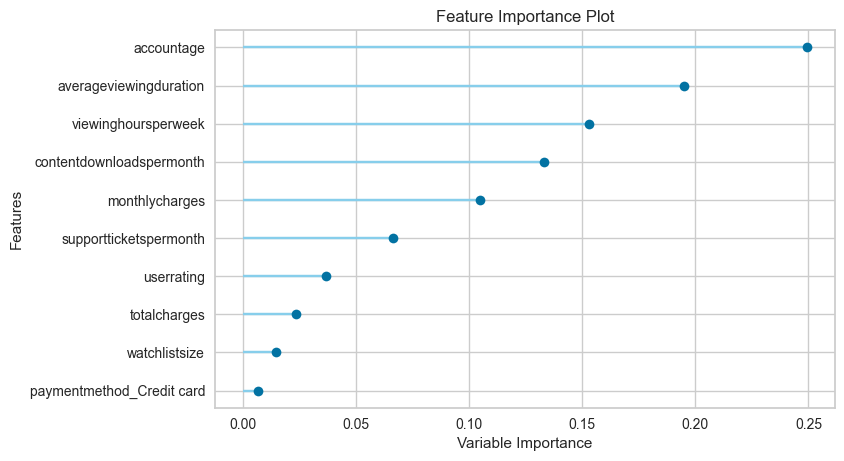

In [19]:
# plot feature importance
plot_model(clf, plot = 'feature')

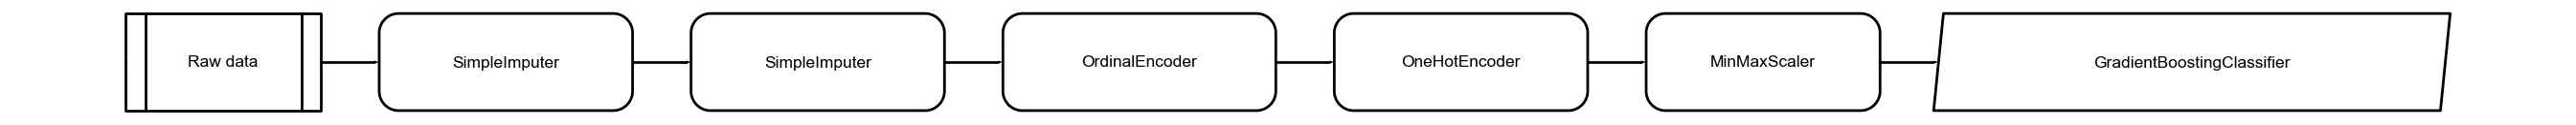

In [20]:
# plot pipeline
plot_model(clf, plot = 'pipeline')

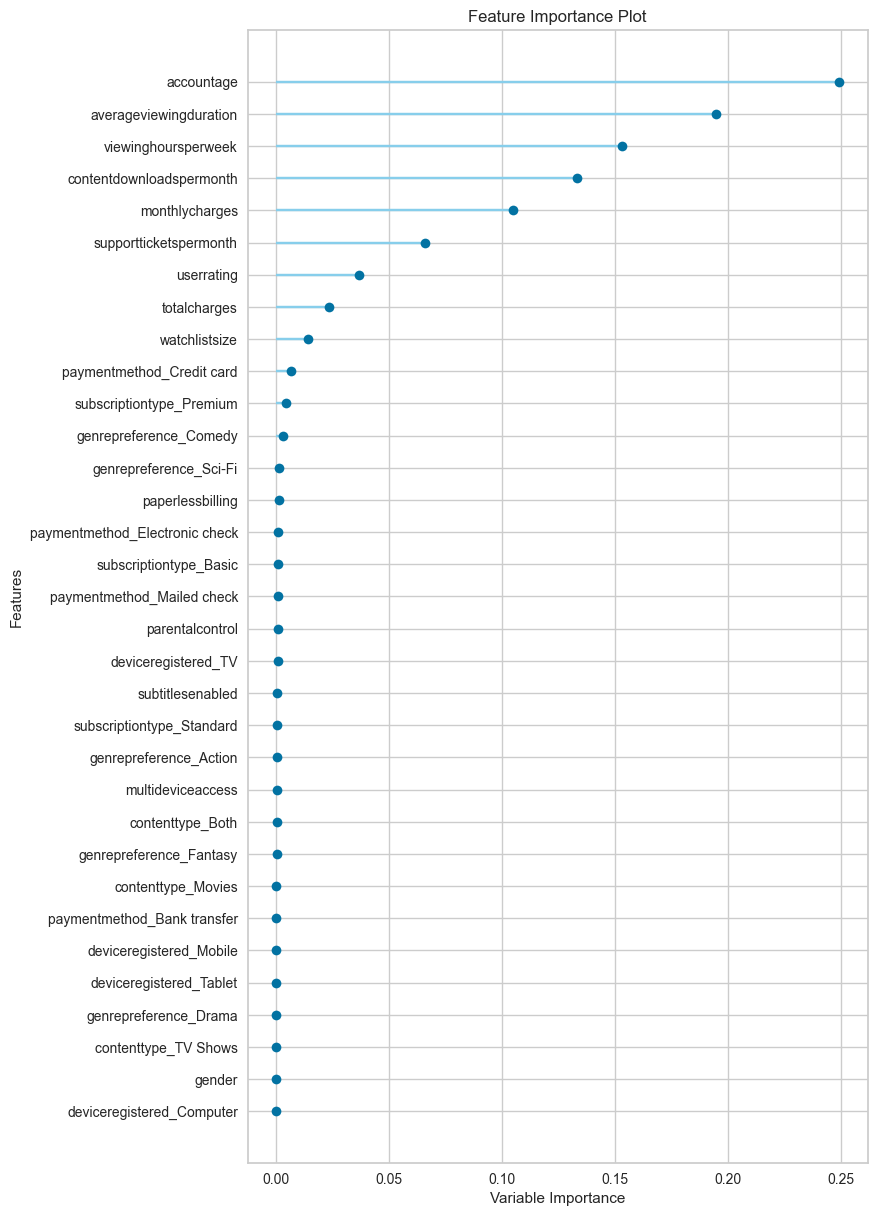

In [22]:
# plot all features
plot_model(clf, plot = 'feature_all')

In [ ]:
# plot rfe
plot_model(clf, plot = 'rfe')

In [ ]:
# plot class report
plot_model(clf, plot = 'class_report', scale=2)

In [ ]:
# check docstring to see available plots 
# help(plot_model)

## ✅ Create Model
This function trains and evaluates the performance of a given estimator using cross-validation. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function. All the available models can be accessed using the models function.

In [ ]:
#help(create_model)

In [24]:
# train logistic regression with default fold=10
gbc = create_model('gbc', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8249,0.7267,0.0825,0.6042,0.1452,0.1065,0.1752
1,0.8193,0.7293,0.0812,0.4872,0.1392,0.0925,0.1406
2,0.8216,0.7377,0.0798,0.5283,0.1386,0.0959,0.1516
3,0.8174,0.7174,0.1026,0.4675,0.1682,0.1106,0.1517
4,0.8254,0.7160,0.0798,0.6154,0.1412,0.1042,0.1752
Mean,0.8217,0.7254,0.0852,0.5405,0.1465,0.1020,0.1589
Std,0.0031,0.0080,0.0088,0.0600,0.0111,0.0067,0.0139


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

The function above has return trained model object as an output. The scoring grid is only displayed and not returned. If you need access to the scoring grid you can use `pull` function to access the dataframe.

In [ ]:
gbc_results = pull()
print(type(gbc_results))
gbc_results

In [ ]:
# interpret summary model
interpret_model(gbc, plot = 'summary')

## ✅ Tune Model

This function tunes the hyperparameters of the model. The output of this function is a scoring grid with cross-validated scores by fold. The best model is selected based on the metric defined in optimize parameter. Metrics evaluated during cross-validation can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [ ]:
#help(tune_model)

In [25]:
# tune hyperparameters of dt
tuned_gbc = tune_model(gbc, fold=5, optimize="AUC", search_library= 'scikit-learn', n_iter= 10,
                       early_stopping=False, early_stopping_max_iters= 10, return_tuner = False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8229,0.7228,0.0213,0.8333,0.0416,0.0329,0.1157
1,0.8216,0.7289,0.0185,0.6500,0.0360,0.0263,0.0878
2,0.8213,0.7379,0.0157,0.6471,0.0306,0.0223,0.0804
3,0.8195,0.7188,0.0071,0.4167,0.0140,0.0080,0.0342
4,0.8218,0.7213,0.0114,0.8889,0.0225,0.0180,0.0887
Mean,0.8214,0.7259,0.0148,0.6872,0.0289,0.0215,0.0814
Std,0.0011,0.0068,0.0051,0.1663,0.0098,0.0083,0.0264


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
# define tuning grid
dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12]}

# tune model with custom grid and metric = F1
tuned_dt = tune_model(dt, custom_grid = dt_grid, optimize = 'F1')

In [ ]:
# to access the tuner object you can set return_tuner = True
tuned_dt, tuner = tune_model(dt, return_tuner=True)

In [29]:
# model object
tuned_gbc

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=1,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.05, min_samples_leaf=5,
                           min_samples_split=9, min_weight_fraction_leaf=0.0,
                           n_estimators=150, n_iter_no_change=None,
                           random_state=0, subsample=0.45, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
# tuner object
tuner

## ✅ Ensemble Model

This function ensembles a given estimator. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [ ]:
# ensemble with bagging
ensemble_model(dt, method = 'Bagging')

In [ ]:
# ensemble with boosting
ensemble_model(dt, method = 'Boosting')

## ✅ Blend Models

This function trains a Soft Voting / Majority Rule classifier for select models passed in the estimator_list parameter. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

## Prediction
The `predict_model` function returns `prediction_label` and `prediction_score` (probability of the predicted class) as new columns in dataframe. When data is `None` (default), it uses the test set (created during the setup function) for scoring.

In [ ]:
# predict on test set
holdout_pred = predict_model(clf)

In [ ]:
# show predictions df
holdout_pred.head()

In [ ]:
# predict model on new_data
predictions = predict_model(clf, data = new_data)
predictions.head()

## Save Model

Finally, you can save the entire pipeline on disk for later use, using pycaret's `save_model` function.

In [ ]:
# save pipeline
save_model(clf, 'my_first_pipeline')

In [ ]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

**=================================================================================================================**

#### Python code done by Dennis Lam